In [17]:
import pandas as pd

In [28]:
df_train = pd.read_csv('nlp-getting-started/train.csv', delimiter=',')
df_test = pd.read_csv('nlp-getting-started/test.csv', delimiter=',')

In [32]:
df_train = df_train[['text', 'target']]
df_test = df_test[['text']]

In [36]:
df_train.head(10)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
5,#RockyFire Update => California Hwy. 20 closed...,1
6,#flood #disaster Heavy rain causes flash flood...,1
7,I'm on top of the hill and I can see a fire in...,1
8,There's an emergency evacuation happening now ...,1
9,I'm afraid that the tornado is coming to our a...,1


In [34]:
df_test.head(10)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
5,We're shaking...It's an earthquake
6,They'd probably still show more life than Arse...
7,Hey! How are you?
8,What a nice hat?
9,Fuck off!


In [37]:
len(df_train)

7613

In [38]:
len(df_test)

3263

In [70]:
df_train['target'].unique().tolist()

[1, 0]

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [41]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")

In [48]:
X = df_train['text']
Y = df_train['target']

In [52]:
Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [56]:
features_train = vectorizer.fit_transform(X_train)

In [57]:
features_test = vectorizer.transform(X_test)

In [58]:
feature_names = vectorizer.get_feature_names_out()

In [62]:
from sklearn.linear_model import RidgeClassifier

In [63]:
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(features_train, Y_train)
pred = clf.predict(features_test)

In [64]:
print(pred)

[0 0 1 ... 1 1 0]


In [66]:
import matplotlib.pyplot as plt

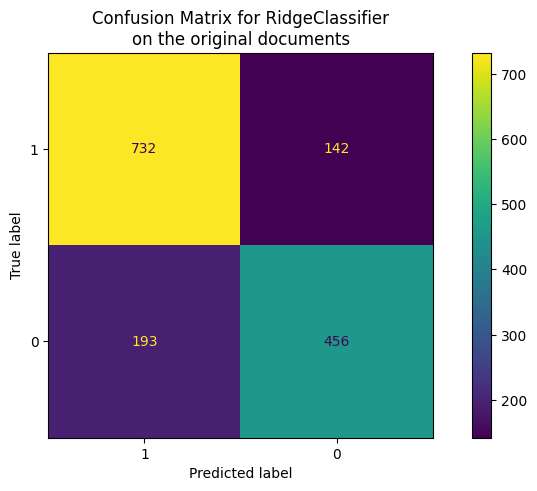

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(Y_test, pred, ax=ax)
ax.xaxis.set_ticklabels(df_train['target'].unique().tolist())
ax.yaxis.set_ticklabels(df_train['target'].unique().tolist())
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)

In [72]:
from sklearn import metrics

In [73]:
score = metrics.accuracy_score(Y_test, pred)

In [74]:
score

0.7800393959290873

In [76]:
from time import time
from sklearn.utils.extmath import density

In [85]:
def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(features_train, Y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")

    t0 = time()
    prediction = clf.predict(features_test)
    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    score = metrics.accuracy_score(Y_test, prediction)
    print(f"accuracy:   {score:.3}")

    # if hasattr(clf, "coef_"):
    #     print(f"dimensionality: {clf.coef_.shape[1]}")
    #     print(f"density: {density(clf.coef_)}")
    #     print()

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, score, train_time, test_time

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC

In [98]:
results = []
for clf, name in (
    (LogisticRegression(C=1, max_iter=1000), "Logistic Regression"),
    (RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Classifier"),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    # L2 penalty Linear SVC
    (LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    # L2 penalty Linear SGD
    (
        SGDClassifier(
            loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True
        ),
        "log-loss SGD",
    ),
    (NearestCentroid(), "NearestCentroid"),
    # Sparse naive Bayes classifier
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

Logistic Regression
________________________________________________________________________________
Training: 
LogisticRegression(C=1, max_iter=1000)
train time: 0.018s
test time:  0.0s
accuracy:   0.797

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sparse_cg')
train time: 0.011s
test time:  0.001s
accuracy:   0.779

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=100)
train time: 0.001s
test time:  0.129s
accuracy:   0.729

Random Forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 4.36s
test time:  0.111s
accuracy:   0.783

Linear SVC
________________________________________________________________________________
Training: 
LinearSVC(C=0.1, dual=False)
train time: 0.00801s
test time:  0.0s
accuracy:   0.798

log-loss SGD
____________

In [88]:
for i in results:
    print(i)

('Logistic Regression', 0.7800393959290873, 0.02699899673461914, 0.0010030269622802734)
('Ridge Classifier', 0.7793827971109653, 0.012629985809326172, 0.0)
('kNN', 0.7288246881155613, 0.0010004043579101562, 0.14299774169921875)
('Random Forest', 0.7852921864740644, 4.309478044509888, 0.10436534881591797)
('Linear SVC', 0.7977675640183848, 0.008646726608276367, 0.0010318756103515625)
('log-loss SGD', 0.7951411687458962, 0.01100015640258789, 0.0)
('NearestCentroid', 0.7426132632961261, 0.15801668167114258, 0.15998268127441406)
('Complement naive Bayes', 0.7839789888378201, 0.004000186920166016, 0.0)


In [89]:
max_accuracy = 0
alg = ''
for i in results:
    if i[1] > max_accuracy:
        max_accuracy = i[1]
        alg = i[0] 

In [90]:
alg, max_accuracy

('Linear SVC', 0.7977675640183848)

In [91]:
from sklearn.model_selection import GridSearchCV

In [124]:
def benchmark_grid(clf, parameters, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    
    grid_search = GridSearchCV(estimator=clf,
                           param_grid=parameters,
                           cv=5,
                           scoring='accuracy')
    
    grid_search.fit(features_train, Y_train)
    train_time = time() - t0
    print(f"train time: {train_time:.3}s")
    
    best_score_grid = float(grid_search.best_score_)
    print(f"Best score: {best_score_grid:.3f}")
    print(f"Best parameters: {grid_search.best_params_}")
    
    # Evaluate on test set
    best_model = grid_search.best_estimator_
    t0 = time()
    accuracy_on_test = best_model.score(features_test, Y_test)
    print(f"Test set accuracy: {accuracy_on_test:.3f}")
    test_time = time() - t0
    print(f"test time:  {test_time:.3}s")

    print()
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    return clf_descr, accuracy_on_test, best_score_grid, train_time, test_time

In [125]:
results_v2 = []
for clf, name, params in (
        (LogisticRegression(), "Logistic Regression", {'C': [0.1, 1, 2, 5, 10], 'max_iter': [100, 1000, 2000]}),
        (RidgeClassifier(), "Ridge Classifier",
         {'alpha': [0.1, 1, 10], 'solver': ['sparse_cg', 'auto', 'lsqr', 'sag']}),
        (KNeighborsClassifier(), "kNN", {'n_neighbors': [10, 30, 70, 100, 200]}),
        (RandomForestClassifier(), "Random Forest", {'max_depth': [1, 2, 3, 4, 5, 50]}),
        # L2 penalty Linear SVC
        (LinearSVC(dual=False), "Linear SVC", {'C': [0.1, 1, 2, 5, 10], 'max_iter': [100, 1000, 2000]}),
        # L2 penalty Linear SGD
        (
            SGDClassifier(
                loss="log_loss", n_iter_no_change=3, early_stopping=True
            ),
            "log-loss SGD", {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10]},
        ),
        (NearestCentroid(), "NearestCentroid", {}),
        # # Sparse naive Bayes classifier
        (ComplementNB(), "Complement naive Bayes", {'alpha': [0.001, 0.01, 0.1, 1, 5, 10]}),
):
    print("=" * 80)
    print(name)
    results_v2.append(benchmark_grid(clf, params, name))

Logistic Regression
________________________________________________________________________________
Training: 
LogisticRegression()
train time: 1.65s
Best score: 0.794
Best parameters: {'C': 1, 'max_iter': 100}
Test set accuracy: 0.797
test time:  0.002s

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier()
train time: 0.925s
Best score: 0.788
Best parameters: {'alpha': 1, 'solver': 'sparse_cg'}
Test set accuracy: 0.779
test time:  0.00203s

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier()
train time: 2.21s
Best score: 0.734
Best parameters: {'n_neighbors': 100}
Test set accuracy: 0.729
test time:  0.136s

Random Forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 10.9s
Best score: 0.768
Best parameters: {'max_depth': 50}
Test set accuracy: 0.766
test time:  0.

for i in results_v2:
    print(i)

In [127]:
df_results = pd.DataFrame(results_v2, columns=['clf_descr', 'accuracy_on_test', 'best_score_grid', 'train_time', 'test_time'])

In [128]:
df_results

,clf_descr,accuracy_on_test,best_score_grid,train_time,test_time
0,Logistic Regression,0.797111,0.793596,1.654313,0.002000
1,Ridge Classifier,0.779383,0.788013,0.925276,0.002026
2,kNN,0.728825,0.734319,2.208011,0.135962
3,Random Forest,0.765594,0.768144,10.905098,0.033995
4,Linear SVC,0.797768,0.793432,1.052003,0.000910
5,log-loss SGD,0.780039,0.787192,0.511284,0.003001
6,NearestCentroid,0.742613,0.746141,0.688416,0.006000
7,Complement naive Bayes,0.778070,0.789163,0.168154,0.001516
